In [1]:
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
x1=np.random.randint(1,30,200000)
x2=np.random.randint(1,30,200000)

y=4+2*x1+3*x2+3*np.random.random(200000)

In [3]:
w=np.random.random(3)

In [4]:
x=pd.DataFrame({'const':np.ones(200000),'x1':x1,'x2':x2})

In [5]:
y.shape

(200000,)

In [6]:
x.shape

(200000, 3)

In [7]:
w.shape

(3,)

## Estimated paramter values from sklearn

In [8]:
lr=LinearRegression()
lr.fit(x.iloc[:,1:],y)

LinearRegression()

In [9]:
w_sklearn=[lr.intercept_]+list(lr.coef_)
w_sklearn

[5.491094046247184, 2.0006031808772655, 2.9999348272765545]

## Paramter Estimation with Gradient Descent

In [10]:
def mypred(features,weights):
    
    preds=np.dot(features,weights)
    return(preds)

In [11]:
mypred(x,w).shape

(200000,)

In [12]:
y

array([ 57.07953173,  99.2166646 ,  51.03492356, ...,  94.44062852,
        70.71703416, 134.23962163])

In [13]:
def myerror(target,features,weights):
    
    preds=mypred(features,weights)
    errors=target-preds
    return(errors)

In [14]:
myerror(y,x,w)

array([ 45.5352894 ,  71.35048006,  39.58647908, ...,  77.06092679,
        58.43248315, 105.89444789])

In [15]:
def mycost(target,features,weights):
    
    errors=myerror(target,features,weights)
    
    cost=np.dot(errors.T,errors)
    
    return(cost)

In [16]:
mycost(y,x,w)

881030875.6358439

In [17]:
def gradient(target,features,weights):
    
    errors=myerror(target,features,weights)
    grad=-np.dot(features.T,errors)/features.shape[0]
    
    return(grad)


In [18]:
gradient(y,x,w)

array([  -61.74021467, -1005.53795427, -1110.39827131])

In [19]:
def my_lr_gd(target,features,learning_rate,num_steps):
    
    weights=np.random.random(features.shape[1])
    cost=[]
    
    for i in range(num_steps):
        
        weights -= learning_rate*gradient(target,features,weights)
#         weights = weights-  learning_rate*gradient(target,features,weights)
        
        cost.append(mycost(target,features,weights))
    return(cost,weights)

In [20]:
cost_gd,w_gd= my_lr_gd(y,x,.001,1000)

In [21]:
w_gd

array([1.32163041, 2.1210259 , 3.12034017])

In [22]:
w_sklearn/w_gd

array([4.15478791, 0.94322431, 0.96141275])

<Axes: >

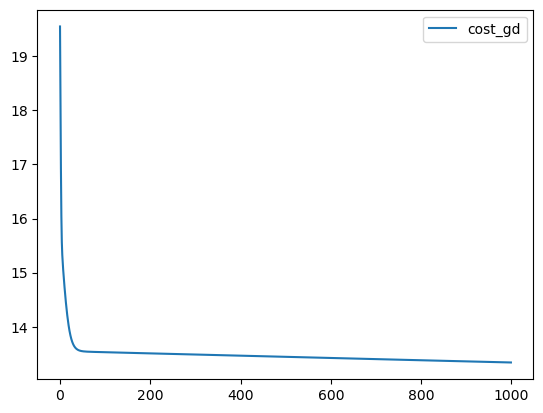

In [23]:
np.log(pd.DataFrame({'cost_gd':cost_gd})).plot()

In [24]:
def my_lr_sgd(target,features,learning_rate,num_steps):
    cost=[]
    weights=np.random.random(features.shape[1])
    
    for i in np.arange(num_steps):
        
        rand_ind=np.random.choice(range(features.shape[0]),10)
        
        target_sub=target[rand_ind]
        
        features_sub=features.iloc[rand_ind,:]
        
        weights -= learning_rate*gradient(target_sub,features_sub,weights)
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [25]:
cost_sgd,w_sgd=my_lr_sgd(y,x,.001,1000)

In [26]:
w_sgd

array([1.06448965, 2.12251575, 3.10954317])

In [27]:
w_sklearn/w_sgd

array([5.15842876, 0.94256223, 0.96475098])

<Axes: >

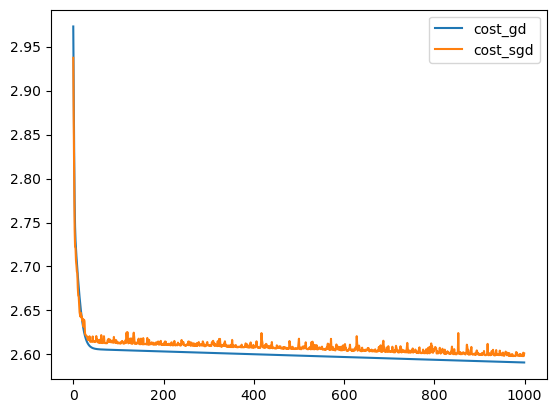

In [28]:
np.log(pd.DataFrame({'cost_gd':np.log(cost_gd),'cost_sgd':np.log(cost_sgd)})).plot()

In [29]:
def my_lr_mom(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    vw=np.zeros(features.shape[1])
    gamma=0.9
    
    for i in np.arange(num_steps):
        
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        vw=gamma*vw+(1-gamma)*gradient(target_sub,features_sub,weights)
        
        vw_a=vw/(1-gamma**(i+1))
        
        weights -= learning_rate*vw_a
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [30]:
cost_mom,w_mom=my_lr_mom(y,x,.01,1000)

In [31]:
w_mom

array([3.91124235, 2.0515554 , 3.00968512])

In [32]:
w_sklearn

[5.491094046247184, 2.0006031808772655, 2.9999348272765545]

In [33]:
w_sklearn/w_mom

array([1.4039258 , 0.9751641 , 0.99676036])

<Axes: >

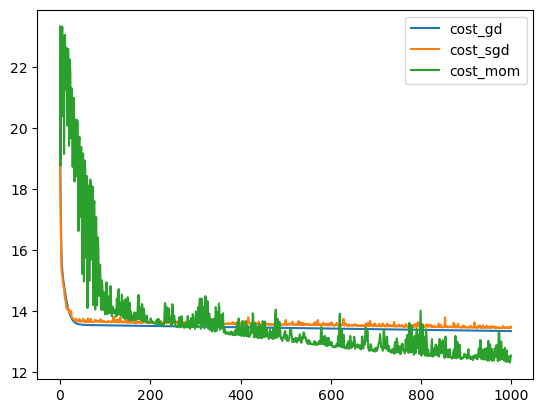

In [34]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom})).plot()

In [35]:
def my_lr_rms(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    
    sw=np.zeros(features.shape[1])
    
    gamma=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        
        sw=gamma*sw+(1-gamma)*(gd**2)
        
        sw_a=sw/(1-gamma**(i+1))
        
        weights -= learning_rate*(gd/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [36]:
cost_rms,w_rms=my_lr_rms(y,x,.1,1000)

In [37]:
w_rms

array([5.54395699, 2.0220398 , 3.02518181])

In [38]:
w_sklearn

[5.491094046247184, 2.0006031808772655, 2.9999348272765545]

In [39]:
w_sklearn/w_rms

array([0.99046476, 0.98939852, 0.99165439])

<Axes: >

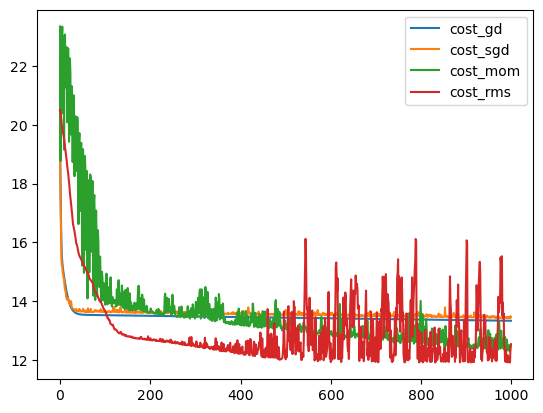

In [40]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms})).plot()

In [41]:
def my_lr_adam(target,features,learning_rate,num_steps):
    cost=[]
    
    weights=np.random.random(features.shape[1])
    sw=np.zeros(features.shape[1])
    vw=np.zeros(features.shape[1])
    beta1=0.9
    beta2=0.99
    
    
    for i in np.arange(num_steps):
        rand_ind=np.random.choice(range(features.shape[0]),10)
        target_sub=target[rand_ind]
        features_sub=features.iloc[rand_ind,:]
        
        gd=gradient(target_sub,features_sub,weights)
        
        vw=beta1*vw+(1-beta1)*gd
        
        sw=beta2*sw+(1-beta2)*(gd**2)
        
        vw_a=vw/(1-beta1**(i+1))
        sw_a=sw/(1-beta2**(i+1))
        
        weights -= learning_rate*(vw_a/(np.sqrt(sw_a)+1e-15))
        
        cost.append(mycost(target,features,weights))
            
    return(cost,weights)

In [42]:
cost_adam,w_adam=my_lr_adam(y,x,.1,1000)

In [43]:
w_adam

array([5.44812228, 1.93962776, 3.00464836])

In [44]:
w_sklearn

[5.491094046247184, 2.0006031808772655, 2.9999348272765545]

In [45]:
w_sklearn/w_adam

array([1.00788745, 1.03143666, 0.99843125])

<Axes: >

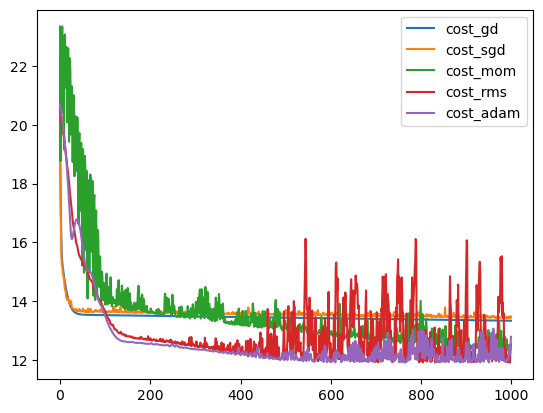

In [46]:
np.log(pd.DataFrame({'cost_gd':cost_gd,'cost_sgd':cost_sgd,'cost_mom':cost_mom,'cost_rms':cost_rms,'cost_adam':cost_adam})).plot()